In [1]:
#!/usr/bin/env python
# encoding: utf-8
from __future__ import absolute_import, division, print_function, unicode_literals
# Install TensorFlow
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten , Convolution2D, MaxPooling2D , Lambda, Conv2D, Activation,Concatenate
from tensorflow.keras.layers import ActivityRegularization
from tensorflow.keras.optimizers import Adam , SGD , Adagrad
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, CSVLogger, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers , initializers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import NumpyArrayIterator



gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only use the first GPU
try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    tf.config.experimental.set_virtual_device_configuration(
    gpus[0],
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
except RuntimeError as e:
# Visible devices must be set before GPUs have been initialized
    print(e)



from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
# from xgboost import XGBClassifier
import tensorflow.keras.backend as K
from sklearn import metrics

# !pip3 install keras-tuner --upgrade
# !pip3 install autokeras
import kerastuner as kt
import autokeras as ak

# Import local libraries
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import importlib
import os


print("Tensorflow Version is {}".format(tf.__version__))
print("Keras Version is {}".format(tf.keras.__version__))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.device('/device:XLA_GPU:0')
!nvidia-smi

1 Physical GPUs, 1 Logical GPU
Tensorflow Version is 2.4.1
Keras Version is 2.4.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9743157225213825034
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1048576000
locality {
  bus_id: 2
  numa_node: 1
  links {
  }
}
incarnation: 11232288708802295580
physical_device_desc: "device: 0, name: GeForce RTX 3090, pci bus id: 0000:c1:00.0, compute capability: 8.6"
]
Fri Jul 16 05:09:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.04    Driver Version: 455.23.04    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|==========================

In [2]:
HOMEPATH = "/dicos_ui_home/alanchung/UniversalityDNN_DiHiggs/"
Data_High_Level_Features_path =  HOMEPATH + "Data_High_Level_Features/"
savepath = HOMEPATH + "Data_ML/"

try:
    
    data_train = {
            "herwig_ang_train" : 0,
            "pythia_def_train" : 0,
            "pythia_vin_train" : 0,
            "pythia_dip_train" : 0,
#             "sherpa_def_train" : 0
            }  
    
    data_test = {
            "herwig_ang_test" : 0,
            "pythia_def_test" : 0,
            "pythia_vin_test" : 0,
            "pythia_dip_test" : 0,
#             "sherpa_def_test" : 0
            }  
    
    data_val = {
            "herwig_ang_val" : 0,
            "pythia_def_val" : 0,
            "pythia_vin_val" : 0,
            "pythia_dip_val" : 0,
#             "sherpa_def_val" : 0
            }  
    
    for i, element in enumerate(data_train):
        data_train[element] = pd.read_csv(savepath + "BDT/" + str(element) + ".csv")
        
    for i, element in enumerate(data_test):
        data_test[element] = pd.read_csv(savepath + "BDT/" + str(element) + ".csv")
        
    for i, element in enumerate(data_val):
        data_val[element] = pd.read_csv(savepath + "BDT/" + str(element) + ".csv")

    print("All Files are loaded!")

    print("H jet : QCD jet = 1 : 1")
    print("\r")
#     print("{:^8}{:^15}".format("","Pythia Default"))
#     print("{:^8}{:^15}".format("Train #",len(data_train["pythia_def_train"])))
#     print("{:^8}{:^15}".format("Test #",len(data_test["pythia_def_test"])))
#     print("{:^8}{:^15}".format("Val. #",len(data_val["pythia_def_val"])))
    
    
    train = [ len(data_train[element]) for j, element in enumerate(data_train)]
    test = [len(data_test[element]) for j, element in enumerate(data_test)]
    val = [len(data_val[element]) for j, element in enumerate(data_val)]
    print("{:^8}{:^15}{:^15}{:^15}{:^15}".format("","Herwig Angular","Pythia Default","Pythia Vincia","Pythia Dipole"))
    print("{:^8}{:^15}{:^15}{:^15}{:^15}".format("Train #",train[0],train[1],train[2],train[3]))
    print("{:^8}{:^15}{:^15}{:^15}{:^15}".format("Test #",test[0],test[1],test[2],test[3]))
    print("{:^8}{:^15}{:^15}{:^15}{:^15}".format("Val. #",val[0],val[1],val[2],val[3]))
    
    
    for i, element in enumerate(data_val):
        total_list = data_val[element].columns
        break
    
    print("total_list",total_list)

except:
    
    print("Please create training, test and validation datasets.")
    

All Files are loaded!
H jet : QCD jet = 1 : 1

        Herwig Angular Pythia Default  Pythia Vincia  Pythia Dipole 
Train #      70764          70764          70764          70764     
 Test #      15164          15164          15164          15164     
 Val. #      15164          15164          15164          15164     
total_list Index(['GEN', 'SHO', 'PRO', 'MJ1_0', 'PTJ1_0', 't211_0', 'D211_0', 'D221_0',
       'C211_0', 'C221_0', 'MJ1', 'PTJ1', 't211', 'D211', 'D221', 'C211',
       'C221', 'eventindex', 'index', 'target'],
      dtype='object')


In [4]:
def DNN_Model(name):
    
    model_DNN = Sequential(name = "Model_DNN_"+str(name))



    model_DNN.add(keras.Input(shape=(len(features),), name = 'input'))
#     model_DNN_1.add(Dense(256, activation='relu', name = 'dense_1'))
    model_DNN.add(Dense(64, activation='relu', name = 'dense_1'))
    model_DNN.add(Dense(32, activation='relu', name = 'dense_2'))
#     model_DNN_1.add(Dense(32, activation='relu', name = 'dense_4'))
    model_DNN.add(Dense(1, activation='sigmoid', name = 'dense_3'))
#     model_DNN_1.add(ActivityRegularization(l2=0.1, name = 'Regularization'))
    model_DNN.add(Dropout(0.00001))
    
    
    # model_opt = keras.optimizers.Adadelta()
    model_opt = keras.optimizers.Adam()
    model_DNN.compile(loss="binary_crossentropy",#keras.losses.binary_crossentropy
                              optimizer=model_opt,
                              metrics=['accuracy'])

    model_DNN.summary()

    return model_DNN


In [5]:
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
print("######################################################################################")
print("\n")
############################################################################################################################################################
 
features = ["MJ1_0","t211_0","D211_0","D221_0","C211_0","C221_0"] #7/14
# features = ["MJ1_0","t211_0","D211_0","D221_0","C211_0","C221_0","MJ2_0","t212_0","D212_0","D222_0","C212_0","C222_0"] # 7/14
#     features = ["MJ2_0","t212_0","D212_0","D222_0","C212_0","C222_0"]

DNN_Model_A1 = {
              "herwig_ang" : 0,
              "pythia_def" : 0, 
              "pythia_vin" : 0, 
              "pythia_dip" : 0, 
#               "sherpa_def" : 0,
            }


for i,(model, trainingdata, valdata) in enumerate(zip(DNN_Model_A1, data_train, data_val)): 
    
    
    try:
        DNN_Model_A1[model] = load_model(savepath + "DNN_Models/" + str(model) + "_DNN_leadingjet" + ".h5")
        print(str(model) + " DNN model 1 is loaded!")
        print("######################################################################################")
        print("\n")
        
    except:
        print("Let's train aDCNN model for {}".format(model))
        print("######################################################################################")
        print("\n")

        ticks_1 = time.time()

        model_DNN = DNN_Model(model)


        check_list=[]
        csv_logger = CSVLogger(savepath + "DNN_Models/" + str(model) + "_DNN_leadingjet_training_log.csv")
        checkpoint = ModelCheckpoint(
                            filepath= savepath + "DNN_Models/" + str(model) + "_DNN_leadingjet_checkmodel.h5",
                            save_best_only=True,
                            verbose=0)
        earlystopping = EarlyStopping(
                            monitor="val_loss",
                            min_delta=0,
                            patience=20,
                            verbose=0,
                            mode="auto",
                            baseline=None,
                            restore_best_weights=False,
                        )
        
        check_list.append(checkpoint)
        check_list.append(csv_logger)
        check_list.append(earlystopping)
        History = model_DNN.fit(np.asarray(data_train[trainingdata][features]), np.asarray(data_train[trainingdata]["target"]),
                        validation_data = (np.asarray(data_val[valdata][features]), np.asarray(data_val[valdata]["target"])),
                        batch_size=64,
                        epochs=200,
                        callbacks=check_list,
                        verbose=0)


        model_DNN.save(savepath + "DNN_Models/" + str(model) + "_DNN_leadingjet" + ".h5")
        hist_df = pd.DataFrame(History.history) 
        hist_df.to_csv(savepath + "DNN_Models/" + str(model) + "_history_DNN_leadingjet.csv")

        DNN_Model_A1[model] = model_DNN

        ticks_2 = time.time()
        ############################################################################################################################################################
        totaltime =  ticks_2 - ticks_1
        print("\n")
        print("\033[3;33mTime consumption : {:.4f} min for CNN\033[0;m".format(totaltime/60.))
        print("######################################################################################")
        print("\n")


Fri Jul 16 05:10:05 2021
######################################################################################


Let's train aDCNN model for herwig_ang
######################################################################################


Model: "Model_DNN_herwig_ang"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
_________________________________________________________________
dropout (Dropout)            (None, 1)                 0         
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


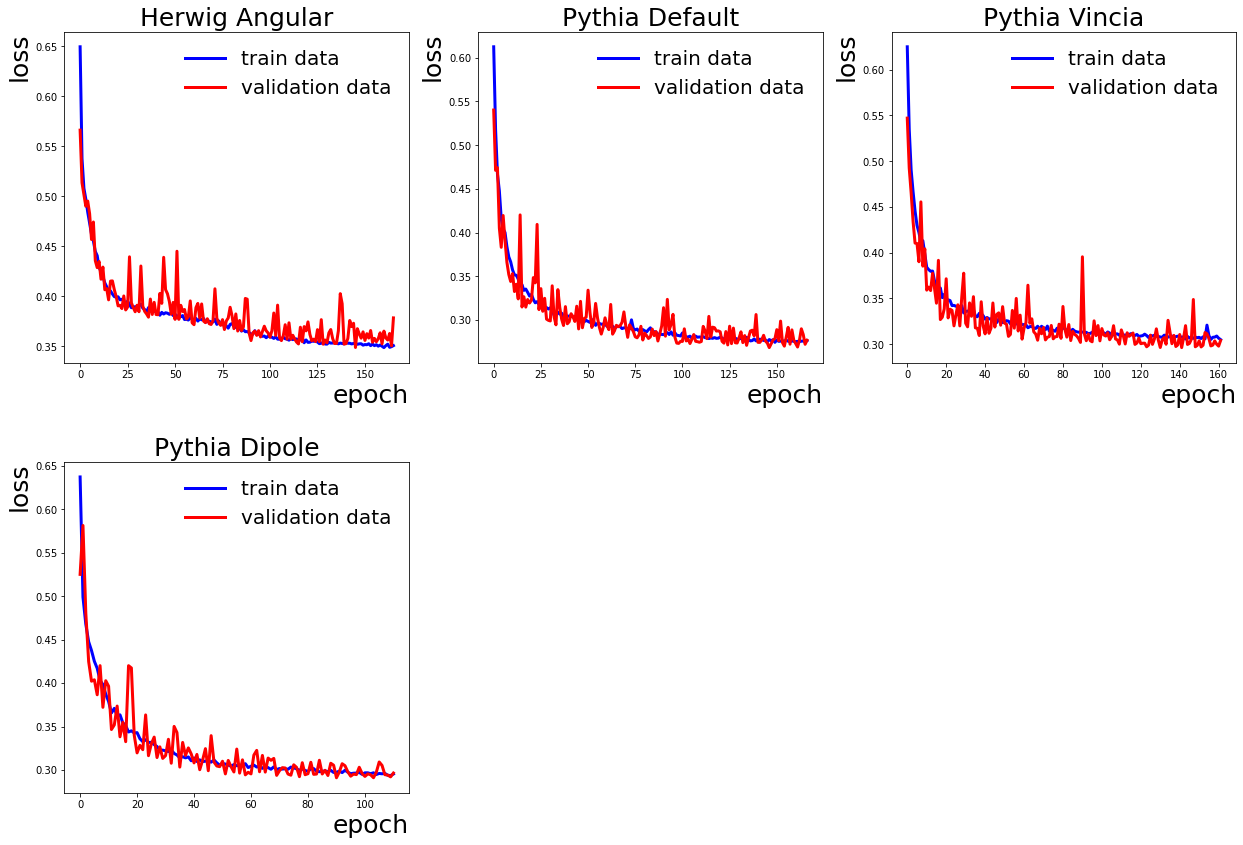

In [6]:
HOMEPATH = "/dicos_ui_home/alanchung/UniversalityDNN_DiHiggs/"
savepath = HOMEPATH + "Data_ML/"

# axis = 1
# if axis == 0:
#     process = "QCD"
# elif axis == 1:
#     process = "H Jet"


DNN_Model_A1_name = [
                 "Herwig Angular", 
                 "Pythia Default",
                 "Pythia Vincia",
                 "Pythia Dipole",  
#                  "Sherpa Default"
                ]

plt.figure(figsize=(21,14))
for i,(name, model) in enumerate(zip(DNN_Model_A1_name, DNN_Model_A1)): 
    plot_axis = plt.subplot(2,3,i+1)

    history = pd.read_csv(savepath + "DNN_Models/" + model + "_history_DNN_leadingjet.csv")

    
    plot_axis.plot(history["loss"], label='train data',c='blue',linewidth = 3)
    plot_axis.plot(history["val_loss"], label='validation data',c='red',linewidth = 3)

    plt.title(name, fontsize=25)

    plot_axis.set_ylabel('loss', fontsize=25,horizontalalignment='right',y=1)
    plot_axis.set_xlabel('epoch', fontsize=25,horizontalalignment='right',x=1)
    plot_axis.legend(loc='best', prop={'size':20}, edgecolor = "w",fancybox=False, framealpha=0)

#     plt.tick_params(which='minor',width=0)
#     plt.tick_params(labelsize=25)
    # plt.savefig("./Figures/learning_curve.pdf", transparent=True)
    
#     plot_axis.set_ylim((0,0.01))
#     plot_axis.set_xlim((400,500))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

In [7]:
HOMEPATH = "/dicos_ui_home/alanchung/UniversalityDNN_DiHiggs/"
savepath = HOMEPATH + "Data_ML/"

# axis = 1
# if axis == 0:
#     process = "QCD"
# elif axis == 1:
#     process = "H Jet"


DNN_Model_A1_name = [
                 "Herwig Angular", 
                 "Pythia Default",
                 "Pythia Vincia", 
                 "Pythia Dipole", 
#                  "Sherpa Default"
                ]

Performance_Frame = {
                    "AUC" : 0,
                    "max_sig" : 0,
                    "r05" : 0
                    }



try:
    for metric in Performance_Frame:
        Performance_Frame[metric] = pd.read_csv(savepath + "DNN_Models/" + str(metric) + ".csv")
        
    print("All Performance_Frame are loaded!!")
    print("\n")
    
except:

    performance = {
                "AUC" : np.zeros((5,5)),
                "max_sig" : np.zeros((5,5)),
                "r05" : np.zeros((5,5))
                }

    for i, testdata in enumerate(data_test): 

        print("Test Data: {}".format(testdata))



        for j, model in enumerate(DNN_Model_A1):

            prediction_test =  DNN_Model_A1[model].predict(data_test[testdata][features])
            discriminator_test = prediction_test
            discriminator_test = discriminator_test/(max(discriminator_test))


            performance["AUC"][j,i] = metrics.roc_auc_score(data_test[testdata]["target"],discriminator_test)
            FalsePositiveFull, TruePositiveFull, _ = metrics.roc_curve(data_test[testdata]["target"],discriminator_test)
            tmp = np.where(FalsePositiveFull != 0)
            performance["max_sig"][j,i] = max(TruePositiveFull[tmp]/np.sqrt(FalsePositiveFull[tmp])) 
            tmp = np.where(TruePositiveFull >= 0.5)
            performance["r05"][j,i] = 1./FalsePositiveFull[tmp[0][0]]

    for i in performance:
        element = performance[i]

        Performance_Frame[i] = pd.DataFrame(
                        {"Herwig Angular": [element[0,0],element[1,0],element[2,0],element[3,0], np.average(element[:4,0]),np.std(element[:4,0])],
                         "Pythia Default": [element[0,1],element[1,1],element[2,1],element[3,1], np.average(element[:4,1]),np.std(element[:4,1])],
                         "Pythia Vincia":  [element[0,2],element[1,2],element[2,2],element[3,2], np.average(element[:4,2]),np.std(element[:4,2])],
                         "Pythia Dipole":  [element[0,3],element[1,3],element[2,3],element[3,3], np.average(element[:4,3]),np.std(element[:4,3])],
                         "Average": [np.average(element[0,:4]),np.average(element[1,:4]),np.average(element[2,:4]),np.average(element[3,:4]),0,0],
                         "STD": [np.std(element[0,:4]),np.std(element[1,:4]),np.std(element[2,:4]),np.std(element[3,:4]),0,0]
                        },
                        index=["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Average", "STD"]
                               )

        Performance_Frame[i].to_csv(savepath  + "DNN_Models/" +  str(i) + ".csv")



print("Models are trained by row and test to column.")
print("\r")

for element in Performance_Frame:
    number = Performance_Frame[element]
    print("Performance in "+ str(element))
    print("\r")
    print("{:^15}{:^15}{:^15}{:^15}{:^15}{:^15}{:^10}{:^10}".format("","Herwig Angular","Pythia Default","Pythia Vincia","Pythia Dipole","Sherpa Default", "Average", "STD"))

    for i, _ in enumerate(DNN_Model_A1_name):
        print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^10.3f}{:^10.3f}".format(DNN_Model_A1_name[i],number["Herwig Angular"][i], number["Pythia Default"][i], number["Pythia Vincia"][i], number["Pythia Dipole"][i], 0, number["Average"][i], number["STD"][i]))

    print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("Average",number["Herwig Angular"][i+1], number["Pythia Default"][i+1], number["Pythia Vincia"][i+1], number["Pythia Dipole"][i+1], 0))
    print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("STD",number["Herwig Angular"][i+2], number["Pythia Default"][i+2], number["Pythia Vincia"][i+2], number["Pythia Dipole"][i+2], 0))
    print("\r")



Test Data: herwig_ang_test
Test Data: pythia_def_test
Test Data: pythia_vin_test
Test Data: pythia_dip_test
Models are trained by row and test to column.

Performance in AUC

               Herwig Angular Pythia Default  Pythia Vincia  Pythia Dipole Sherpa Default  Average     STD    
Herwig Angular      0.918          0.945          0.936          0.944          0.000       0.936     0.011   
Pythia Default      0.918          0.954          0.946          0.951          0.000       0.942     0.014   
 Pythia Vincia      0.915          0.950          0.941          0.948          0.000       0.939     0.014   
 Pythia Dipole      0.912          0.950          0.941          0.947          0.000       0.938     0.015   
    Average         0.916          0.950          0.941          0.947          0.000     
      STD           0.002          0.003          0.004          0.002          0.000     

Performance in max_sig

               Herwig Angular Pythia Default  Pythia Vincia  Py

Training Data: herwig_ang_train, Test Data: herwig_ang_test


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide


Training Data: pythia_def_train, Test Data: pythia_def_test


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide


Training Data: pythia_vin_train, Test Data: pythia_vin_test


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide


Training Data: pythia_dip_train, Test Data: pythia_dip_test


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide


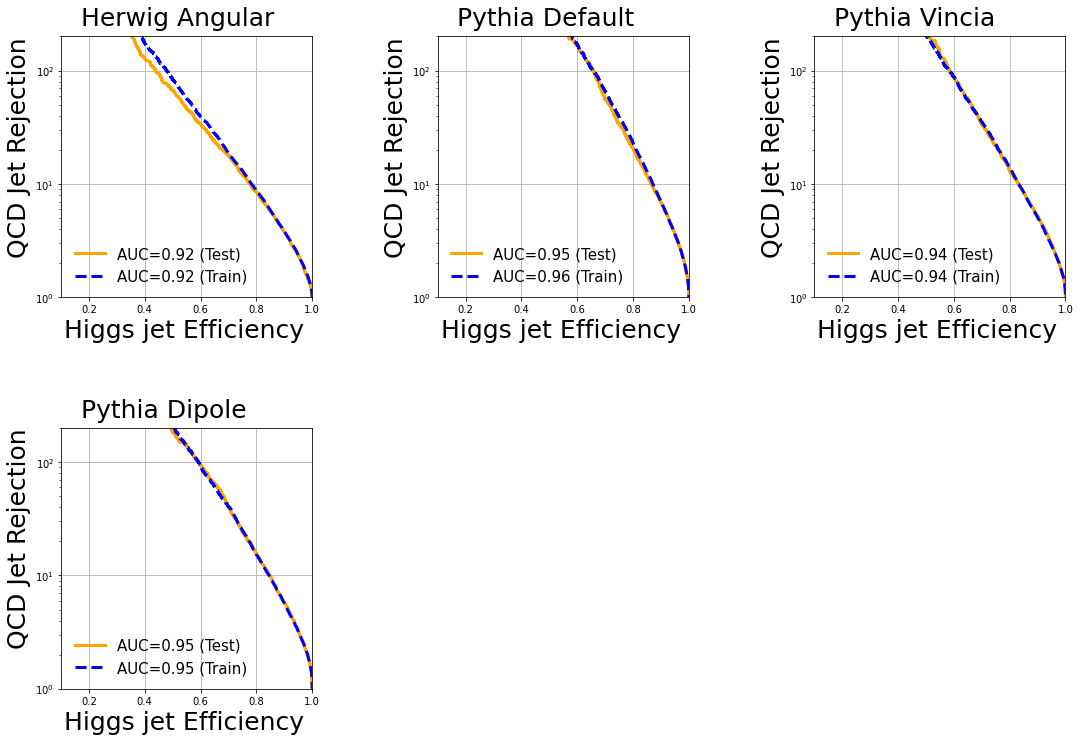

In [8]:
DNN_Model_A1_name = [
                 "Herwig Angular", 
                 "Pythia Default",
                 "Pythia Vincia", 
                 "Pythia Dipole", 
#                  "Sherpa Default"
                ]


plt.figure(figsize=(18,12))
for i,(traindata, testdata, model) in enumerate(zip(data_train, data_test, DNN_Model_A1)): 
    
    print("Training Data: {}, Test Data: {}".format(traindata, testdata))

    plot_axis = plt.subplot(2,3,i+1)

    prediction_DNN_test = DNN_Model_A1[model].predict(data_test[testdata][features])
    prediction_DNN_train = DNN_Model_A1[model].predict(data_train[traindata][features])

    discriminator_test = prediction_DNN_test
    discriminator_train = prediction_DNN_train

    discriminator_test = discriminator_test/(max(discriminator_test))
    discriminator_train = discriminator_train/(max(discriminator_train))
    


    test_auc_DNN_test = metrics.roc_auc_score(data_test[testdata]["target"],discriminator_test)
    FalsePositiveFull_DNN_test, TruePositiveFull_DNN_test, _ = metrics.roc_curve(data_test[testdata]["target"],discriminator_test)

    train_auc_DNN_train = metrics.roc_auc_score(data_train[traindata]["target"],discriminator_train)
    FalsePositiveFull_DNN_train, TruePositiveFull_DNN_train, _ = metrics.roc_curve(data_train[traindata]["target"],discriminator_train)


#     plt.plot(TruePositiveFull_CNN_test,1-FalsePositiveFull_CNN_test,"-", color='orange', linewidth = 3, label='AUC={0:.2f} (Test)'.format(test_auc_CNN_test))
#     plt.plot(TruePositiveFull_CNN_train,1-FalsePositiveFull_CNN_train,"--", color='b', linewidth = 3, label='AUC={0:.2f} (Train)'.format(train_auc_CNN_train))
    plt.plot(TruePositiveFull_DNN_test,1./FalsePositiveFull_DNN_test,"-", color='orange', linewidth = 3, label='AUC={0:.2f} (Test)'.format(test_auc_DNN_test))
    plt.plot(TruePositiveFull_DNN_train,1./FalsePositiveFull_DNN_train,"--", color='b', linewidth = 3, label='AUC={0:.2f} (Train)'.format(train_auc_DNN_train))



# plt.scatter(0.75,1./0.32, marker="D", s=300 , c='b')
# plt.scatter(0.70,1./0.13, marker="D", s=300 , c='orange')

#     plot_axis.set_xlim((0,1))
#     plot_axis.set_ylim((0,1))
    # plt.yscale("log")
    plt.xlim((0,1))
    plt.ylim((1, 1E+4))
    plt.yscale("log")
#     plot_axis.set_tick_params(axis='x', labelsize=25)
#     plot_axis.set_tick_params(axis='y', labelsize=25)
    # ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5))
    plot_axis.set_xlabel('Higgs jet Efficiency ', fontsize=25,horizontalalignment='right',x=1)
    plot_axis.set_ylabel('QCD Jet Rejection', fontsize=25,horizontalalignment='right',y=1)
    plot_axis.legend(ncol=1,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
#     plt.tight_layout()
    plot_axis.text(x=0.17, y=2.5E+2, s=str(DNN_Model_A1_name[i]),fontsize=25) 

    plot_axis.set_xlim((0.1,1))
    plot_axis.set_ylim((1, 2E+2))
    plot_axis.set_yscale("log")
    plot_axis.grid()
# plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

Training Data: herwig_ang_train, Test Data: herwig_ang_test
Training Data: pythia_def_train, Test Data: pythia_def_test


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide


Training Data: pythia_vin_train, Test Data: pythia_vin_test


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide


Training Data: pythia_dip_train, Test Data: pythia_dip_test


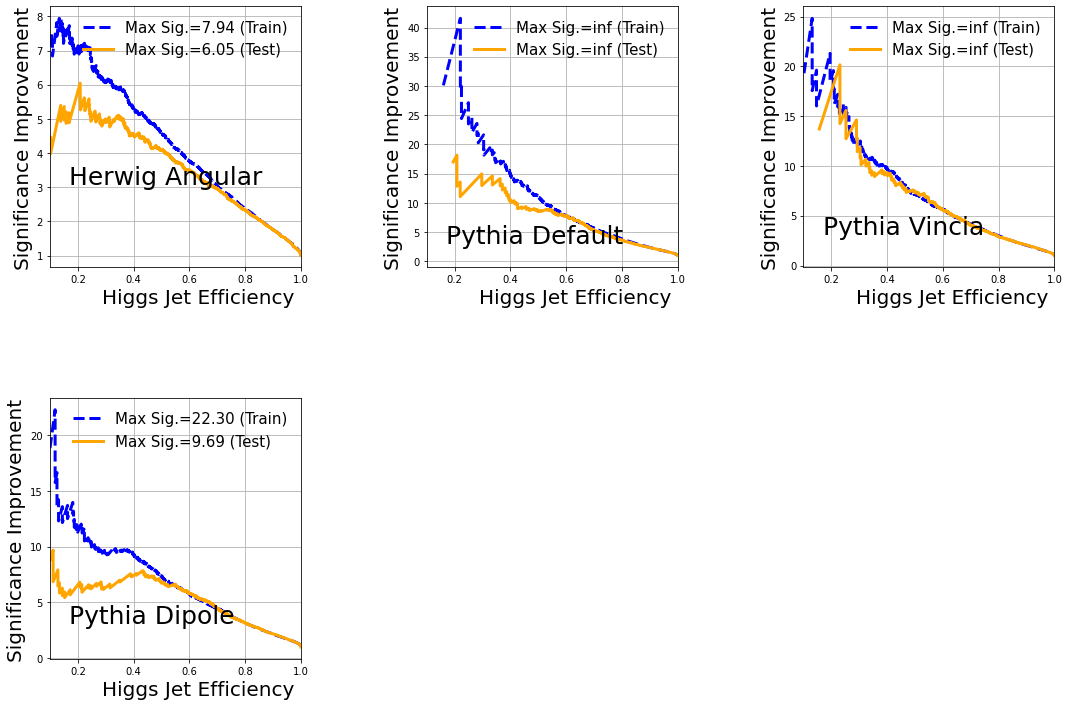

In [10]:
DNN_Model_A1_name = [
                 "Herwig Angular", 
                 "Pythia Default",
                 "Pythia Vincia", 
                 "Pythia Dipole", 
#                  "Sherpa Default"
                ]


plt.figure(figsize=(18,12))
for i,(traindata, testdata, model) in enumerate(zip(data_train, data_test, DNN_Model_A1)): 
    
    print("Training Data: {}, Test Data: {}".format(traindata, testdata))

    plot_axis = plt.subplot(2,3,i+1)

    prediction_DNN_test = DNN_Model_A1[model].predict(data_test[testdata][features])
    prediction_DNN_train = DNN_Model_A1[model].predict(data_train[traindata][features])

    discriminator_test = prediction_DNN_test
    discriminator_train = prediction_DNN_train

    discriminator_test = discriminator_test/(max(discriminator_test))
    discriminator_train = discriminator_train/(max(discriminator_train))
    


    test_auc_DNN_test = metrics.roc_auc_score(data_test[testdata]["target"],discriminator_test)
    FalsePositiveFull_DNN_test, TruePositiveFull_DNN_test, _ = metrics.roc_curve(data_test[testdata]["target"],discriminator_test)

    train_auc_DNN_train = metrics.roc_auc_score(data_train[traindata]["target"],discriminator_train)
    FalsePositiveFull_DNN_train, TruePositiveFull_DNN_train, _ = metrics.roc_curve(data_train[traindata]["target"],discriminator_train)

    a = np.where(TruePositiveFull_DNN_test > 0.1)
    b = np.where(TruePositiveFull_DNN_train > 0.1)
#     plt.plot(TruePositiveFull_CNN_test,1-FalsePositiveFull_CNN_test,"-", color='orange', linewidth = 3, label='AUC={0:.2f} (Test)'.format(test_auc_CNN_test))
    max_sig_test = max(TruePositiveFull_DNN_test[a]/np.sqrt(FalsePositiveFull_DNN_test[a]))
    max_sig_train = max(TruePositiveFull_DNN_train[b]/np.sqrt(FalsePositiveFull_DNN_train[b]))
    plt.plot(TruePositiveFull_DNN_train[b],TruePositiveFull_DNN_train[b]/np.sqrt(FalsePositiveFull_DNN_train[b]),"--", color='b', linewidth = 3, label='Max Sig.={0:.2f} (Train)'.format(max_sig_train))
    plt.plot(TruePositiveFull_DNN_test[a],TruePositiveFull_DNN_test[a]/np.sqrt(FalsePositiveFull_DNN_test[a]),"-", color='orange', linewidth = 3, label='Max Sig.={0:.2f} (Test)'.format(max_sig_test))

# plt.scatter(0.75,1./0.32, marker="D", s=300 , c='b')
# plt.scatter(0.70,1./0.13, marker="D", s=300 , c='orange')

    plot_axis.set_xlim((0.1,1))
#     plot_axis.set_ylim((0.1,3))
    # plt.yscale("log")
    plt.xlim((0.1,1))
#     plt.ylim((1, 1E+4))
#     plt.yscale("log")
#     plot_axis.set_tick_params(axis='x', labelsize=25)
#     plot_axis.set_tick_params(axis='y', labelsize=25)
    # ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5))
    plot_axis.set_xlabel('Higgs Jet Efficiency ', fontsize=20,horizontalalignment='right',x=1)
    plot_axis.set_ylabel('Significance Improvement', fontsize=20,horizontalalignment='right',y=1)
    plot_axis.legend(ncol=1,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
#     plt.tight_layout()
    plot_axis.text(x=0.17, y=3.1, s=str(DNN_Model_A1_name[i]),fontsize=25) 

    plot_axis.set_xlim((0.1,1))
#     plot_axis.set_ylim((1, 2E+2))
#     plot_axis.set_yscale("log")
    plot_axis.grid()
# plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [ ]:

# AUC = np.zeros((5,5))
# max_sig = np.zeros((5,5))
# r05 = np.zeros((5,5))


# for i, testdata in enumerate(data_test): 
    
#     print("Test Data: {}".format(testdata))
    

    
#     for j, model in enumerate(DNN_Model_A1):
        
#         prediction_test =  DNN_Model_A1[model].predict(data_test[testdata][features])
#         discriminator_test = prediction_test
#         discriminator_test = discriminator_test/(max(discriminator_test))
        
        
#         AUC[j,i] = metrics.roc_auc_score(data_test[testdata]["target"],discriminator_test)
#         FalsePositiveFull, TruePositiveFull, _ = metrics.roc_curve(data_test[testdata]["target"],discriminator_test)
#         tmp = np.where(FalsePositiveFull != 0)
#         max_sig[j,i] = max(TruePositiveFull[tmp]/np.sqrt(FalsePositiveFull[tmp])) 
#         tmp = np.where(TruePositiveFull >= 0.5)
#         r05[j,i] = 1./FalsePositiveFull[tmp[0][0]]

        
# print("Models are trained by row and test to column.")
# print("\r")
# print("Performance in AUC")
# print("\r")
# print("{:^15}{:^15}{:^15}{:^15}{:^15}{:^15}{:^10}{:^10}".format("","Herwig Angular","Pythia Default","Pythia Vincia","Pythia Dipole","Sherpa Default", "Average", "STD"))
# for i in range(len(DNN_Model_A1_name)):
#     print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^10.3f}{:^10.3f}".format(DNN_Model_A1_name[i],AUC[i,0], AUC[i,1], AUC[i,2], AUC[i,3], AUC[i,4], np.average(AUC[i,:4]), np.std(AUC[i,:4])))
# print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("Average",np.average(AUC[:4,0]), np.average(AUC[:4,1]), np.average(AUC[:4,2]), np.average(AUC[:4,3]), np.average(AUC[:4,4])))
# print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("STD",np.std(AUC[:4,0]), np.std(AUC[:4,1]), np.std(AUC[:4,2]), np.std(AUC[:4,3]), np.std(AUC[:4,4])))
# print("\r")
# print("Performance in Max Significance")
# print("\r")
# for i in range(len(DNN_Model_A1_name)):
#     print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^10.3f}{:^10.3f}".format(DNN_Model_A1_name[i],max_sig[i,0], max_sig[i,1], max_sig[i,2], max_sig[i,3], max_sig[i,4], np.average(max_sig[i,:4]), np.std(max_sig[i,:4])))

# print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("Average",np.average(max_sig[:4,0]), np.average(max_sig[:4,1]), np.average(max_sig[:4,2]), np.average(max_sig[:4,3]), np.average(max_sig[:4,4])))
# print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("STD",np.std(max_sig[:4,0]), np.std(max_sig[:4,1]), np.std(max_sig[:4,2]), np.std(max_sig[:4,3]), np.std(max_sig[:4,4])))    
# print("\r")
# print("1/fpr @ tpr = 0.5 (rejection at 50% signal efficiency)")
# print("\r")
# for i in range(len(DNN_Model_A1_name)):
#     print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^10.3f}{:^10.3f}".format(DNN_Model_A1_name[i],r05[i,0], r05[i,1], r05[i,2], r05[i,3], r05[i,4], np.average(r05[i,:4]), np.std(r05[i,:4])))
# print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("Average",np.average(r05[:4,0]), np.average(r05[:4,1]), np.average(r05[:4,2]), np.average(r05[:4,3]), np.average(r05[:4,4])))
# print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format("STD",np.std(r05[:4,0]), np.std(r05[:4,1]), np.std(r05[:4,2]), np.std(r05[:4,3]), np.std(r05[:4,4])))    

